<div style="width:100%;height:60px">
<div style="width:60%;height:50px;float:left;"><h2> Advanced DS and analyses UAI/504 </h2></div>
<div style="width:40%;height:50px;float:left;"><img src="img/JCU_DCS.png" width=200px align=right/> </div>
</div>
<div style="width:100%;height:5px;background-color:#408d62"></div>
<h2>Intro to Clustering (Kmeans, PCA, TSNE, SVD, SOM)</h2>

<h4>by: Ivo Bukovsky</h4>


<div style="width:100%;height:5px;background-color:#408d62;margin-top:15px"></div>

<h2> Custering (Unsupervised Classification and Unsupervised Learning)</h2>
<ul>
<li> K-NN, Kmeans, DBSCAN,..., k-MEDOID (for big data)</li>
<li> PCA (1933) </li>
<li> SVD </li>
<li> t-SNE (2008) </li>
<li>UMAP</li>
<li> ICS (Independent Coordinate Search) </li>
<li> LSDA (Locality Sensitive Discriminant Analysis, 2007) </li>
<li> SOM (self organized maps,U-Matrix) </li>
<li> Auto-Encoders </li>

</ul>





<div style="width:100%;height:5px;background-color:#408d62;margin-top:15px"></div>

##  Problem Formulation

Let's have a matrix of features as follows  

<div style="width:100%;height:100px;margin-top:10px">
    <div style="width:90%;height:100px;float:left;text-align:center">
    $\textbf{X}=
        \begin{bmatrix}
        \textbf{x}(k=1)\\
        \textbf{x}(k=2)\\
        \vdots\\
        \textbf{x}(k=N)\\
        \end{bmatrix}=
        \begin{bmatrix}
        x_1(k=1)&x_2(k=1)&...&x_M(k=1)\\
        x_1(k=2)&x_2(k=2)&...&x_M(k=2)\\
        \vdots\\
        x_1(k=N)&x_2(k=N)&...&x_M(k=N)\\
        \end{bmatrix}$
        ,</div>
    <div style="width:10%;height:100px;float:left;text-align:right;margin-top:40px">[1]</div>
</div>
where $\textbf{x}$ is a feature vector, $x_i$ is $i$-th feature of the feature vector,$k$ is sample index, $N$ is number of feature vectors, and $M$ is the number of elements of the feature vector.

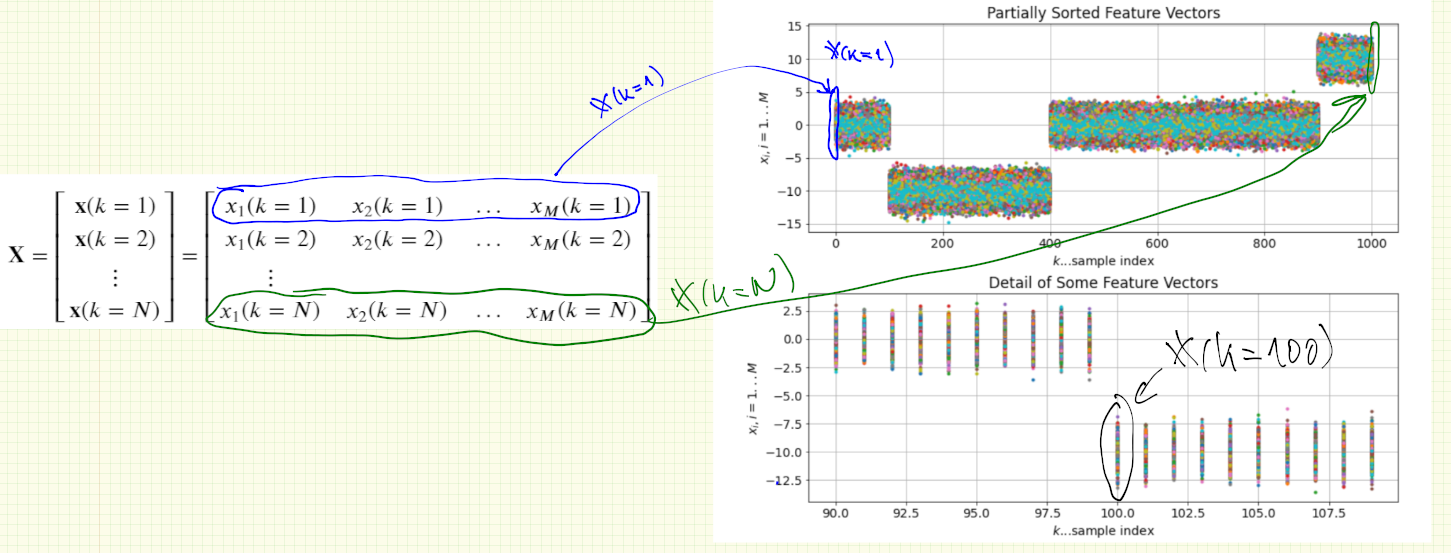


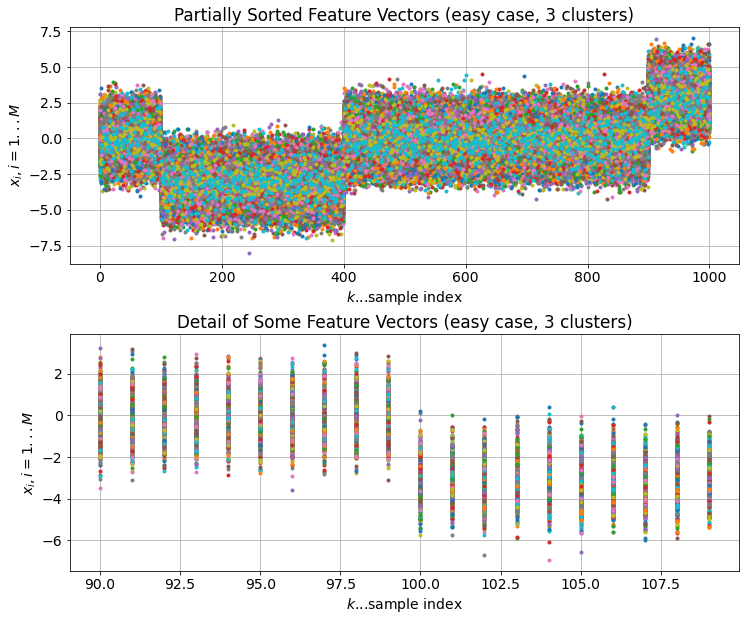

In [1]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
from numpy.random import randn
rcParams.update({'font.size': 14})


M=500   # Lenght of a feature vector
N=1000  # total number of feature vectors

X=randn(N,M) # feature vectors are in rows 

X[:100,:]=X[:100,:]+3
X[:400,:]=X[:400,:]-3
X[-100:,:]=X[-100:,:]+3



figure(figsize=(12,10))
subplots_adjust(hspace=0.3)
subplot(211)
plot(X[:,:],'.');
xlabel("$k$...sample index");title("Partially Sorted Feature Vectors (easy case, 3 clusters)");ylabel("$x_i, i=1...M$");grid()
subplot(212)
plot(range(90,110),X[90:110,:],'.')
xlabel("$k$...sample index");title("Detail of Some Feature Vectors (easy case, 3 clusters)");ylabel("$x_i, i=1...M$");grid()
show()

savetxt("X.txt",X)

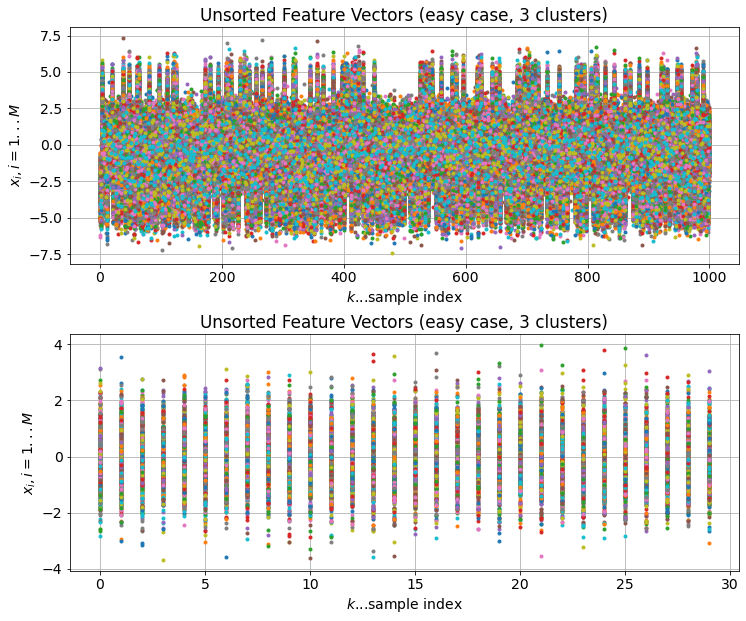

In [2]:
X_uns=loadtxt("x_unsorted.csv",delimiter=",")
figure(figsize=(12,10))
subplots_adjust(hspace=0.3)
subplot(211)
plot(X_uns[:,:],'.');
xlabel("$k$...sample index");title("Unsorted Feature Vectors (easy case, 3 clusters)");ylabel("$x_i, i=1...M$");grid()
subplot(212)
plot(range(30),X[:30,:],'.')
xlabel("$k$...sample index");title("Unsorted Feature Vectors (easy case, 3 clusters)");ylabel("$x_i, i=1...M$");grid()
show()

### K-Means

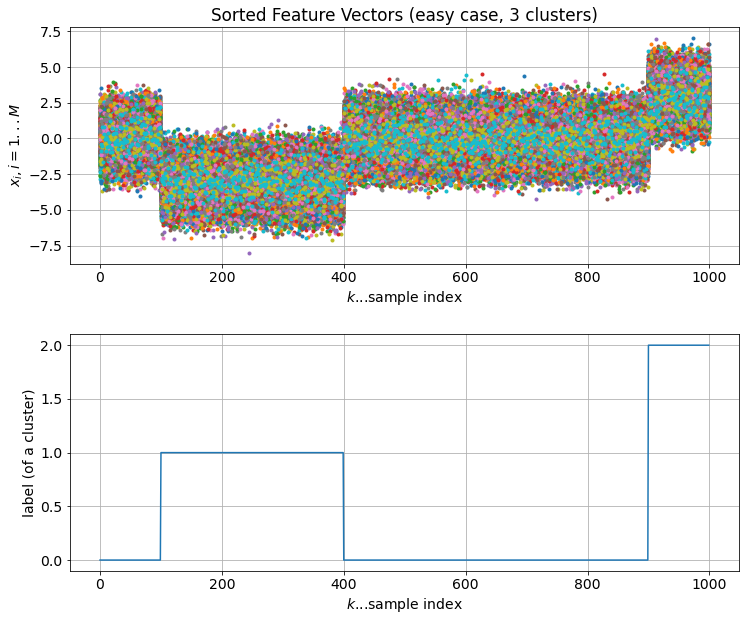

In [3]:
from numpy.random import randn
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

kmeans = KMeans(n_clusters=3).fit(X)
label=zeros(N)
for k in range(N):
    label[k]=kmeans.predict(X[k,:].reshape(1,-1))
    
figure(figsize=(12,10))
subplots_adjust(hspace=0.3)
subplot(211)
plot(X[:,:],'.');
xlabel("$k$...sample index");title("Sorted Feature Vectors (easy case, 3 clusters)");ylabel("$x_i, i=1...M$");grid()
subplot(212)
plot(label);ylabel("$x_i, i=1...M$");grid();ylabel("label (of a cluster)");xlabel("$k$...sample index");
show()

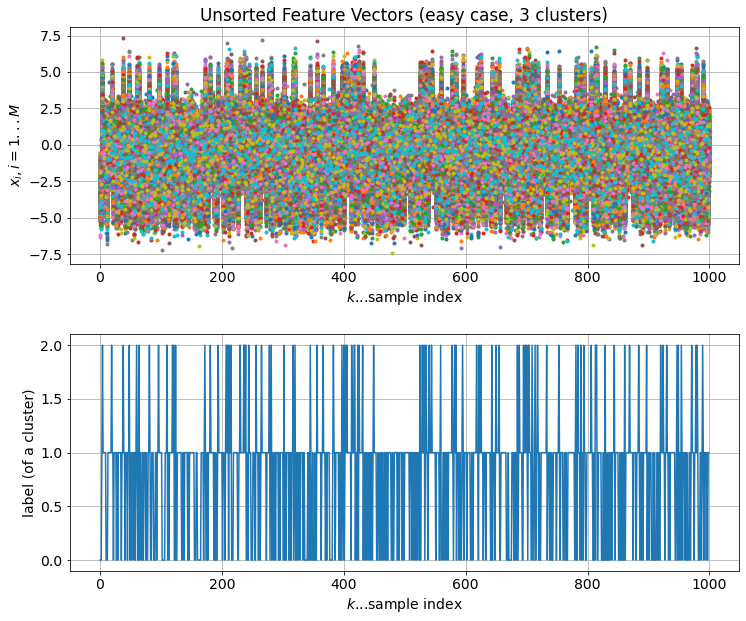

In [4]:
kmeans = KMeans(n_clusters=3).fit(X_uns)
label=zeros(N)
for k in range(N):
    label[k]=kmeans.predict(X_uns[k,:].reshape(1,-1))
    
figure(figsize=(12,10))
subplots_adjust(hspace=0.3)
subplot(211)
plot(X_uns[:,:],'.');
xlabel("$k$...sample index");title("Unsorted Feature Vectors (easy case, 3 clusters)");ylabel("$x_i, i=1...M$");grid()
subplot(212)
plot(label);grid();ylabel("label (of a cluster)");xlabel("$k$...sample index");
show()

## Clustering and Visualization Multidimensional Data

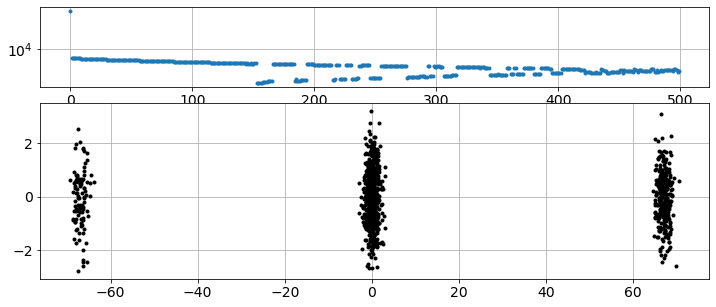

In [5]:
covX=dot(X_uns.T,X_uns)  #X...1000x500, covX...500x500
d,V=linalg.eig(covX)
Xpca=real(dot(X,V[:,:2]))  # 1000x2  .. 2 principal components

figure(figsize=(12,5))
subplot(311)
semilogy(abs(d),'.');grid()
subplot(3,1,(2,3))
plot(Xpca[:,0],Xpca[:,1],'.k');grid()
show()


<div style="width:100%;height:10px;background-color:#777;margin:10px 0 10px 0;"></div>

## PCA - Principal Component Analysis

<div style="font-size:18px;font-family:times;text-align:justify;">
    The PCA can be understood as a data compression method that can preserve correlated phenomena in data and can suppres (filter out) the uncorrelated phenomena. For example, a matrix $\textbf{X}$ with $N$ rows and $m$ columns can be compressed for a smaller number of columns while the most of the properties of data in $\textbf{X}$ can be preserved. In other words, uncorrelated phenomena can be removed from data in $\textbf{X}$ by the PCA compression (and decompression). This can be useful for signals or even sets of input and output signals when filtering out the noise or outliers caused by sensor faults e.g. <br><br>
 There are two ways for PCA-based data compression, i.e., using either:<br>
 <ol>
 <li> the most significant eigenvectors of a covariance matrix of $\textbf{X}$, or <br></li>
 <li> the most significant singular values $\textbf{s}$ with SVD (Singular Value Decomposition) of $\textbf{X}$.</li><br>
 </ol>
 The covariance matrix can be viewed as a matrix of correlation coefficients between multiple variables, i.e., between columns of matrix of $\textbf{X}$.
<br>

Denote $\textbf{X}$ be $N \times m$ matrix of data, where $N$ is the number of samples (length of data) and $m$ is the number of variables (number of 
columns) as follows 
 <div style="width:100%;margin:20px 0 20px 0;height:180px;">
<div style="float:left;width:90%;text-align:center;height:180px;">
$
\begin{align}
\textbf{X}&=
\begin{bmatrix}
 & \textbf{x}_1  & \textbf{x}_2 & \cdots & \textbf{x}_m 
\end{bmatrix}\\ \\
&=
\begin{bmatrix}
x_1(k=1) & x_2(k=1) & \cdots & x_m(k=1) \\
x_1(k=2) & x_2(k=2) & \cdots & x_m(k=2) \\
\vdots & \vdots & \cdots & \vdots \\
x_1(k=N) & x_2(k=N) & \cdots & x_m(k=N) \\
\end{bmatrix}, 
\end{align}
$
</div>
<div style="float:left;width:10%;padding:80px 0 0 0;text-align:right;height:100px;"> <b> (1) </b></div> </div>
where $\textbf{x}_i$ can be either distinct variables or data, or it can be so called Delay Embedded Matrix (DEM) that could for a single time series $\textbf{y}$ of $N$ samples look as follows

 <div style="width:100%;margin:20px 0 20px 0;height:180px;">
<div style="float:left;width:90%;text-align:center;height:180px;">
$
\begin{align}
\textbf{X}&=
\begin{bmatrix}
 & \textbf{y}(k=m:N)  & \textbf{y}(k=m-1:N-1) & \cdots & \textbf{y}(k=1:N-m+1) 
\end{bmatrix}\\ \\
&=
\begin{bmatrix}
y(m)   & y(m-1)  & \cdots & y(1) \\
y(m+1) & y(m)    & \cdots & y(2) \\
\vdots   & \vdots    & \cdots & \vdots \\
y(N)   & y(N-1)  & \cdots & y(N-m+1) \\
\end{bmatrix}, 
\end{align}
$
</div>
<div style="float:left;width:10%;padding:80px 0 0 0;text-align:right;height:100px;"> <b> (2) </b></div> </div>

To proceed with PCA, we may need to Z-score the individual variables to zero mean and unit standard deviation as follows
 <div style="width:100%;margin:5px 0 5px 0;height:50px;">
<div style="float:left;width:90%;text-align:center;height:50">
$ \textbf{x}_i\leftarrow\large\frac{\textbf{x}_i-\overline{\textbf{x}_i}}{\large\sigma_i}; \normalsize i=1\dots m $
</div>
<div style="float:left;width:10%;padding:20px 0 0 0;text-align:right;height:30px;"> <b> (3) </b></div> </div>
<p>
Then we can calculate $m \times m$ covariance matrix as follows </p>
 <div style="width:100%;margin:5px 0 5px 0;height:30px;">
<div style="float:left;width:90%;text-align:center;height:30">
$\textbf{covX}=\textbf{X}^T\cdot \textbf{X}.$
</div>
<div style="float:left;width:10%;padding:10px 0 0 0;text-align:right;height:20px;"> <b> (4) </b></div> </div>
<p>
Then we calculate $m$ eigenvectors and eigenvalues of $\textbf{covX}$. Then $n$ of the most significant eigenvectors can be used for linear transformation (compression) and pseudo-inverse decompression of data matrix $\textbf{X}$ as follows</p>
 <div style="width:100%;margin:5px 0 5px 0;height:30px;">
<div style="float:left;width:90%;text-align:center;height:30">
$\textbf{X}_{PCA}=(\textbf{X}\cdot \textbf{V}_{PCA})\cdot \textbf{V}_{PCA}^T$
</div>
<div style="float:left;width:10%;padding:10px 0 0 0;text-align:right;height:20px;"> <b> (5) </b></div> </div>
<p>
With the use of SVD, we can use $n$ of largest singular values $\textbf{s}$ as follows: 
 <div style="width:100%;margin:5px 0 5px 0;height:30px;">
<div style="float:left;width:90%;text-align:center;height:30"><br>
$\textbf{X}_{svd}=\textbf{U}\cdot diag(\textbf{s})\cdot \textbf{V}.$
</div>
<div style="float:left;width:10%;padding:10px 0 0 0;text-align:right;height:20px;"> <b> (6) </b></div> </div>
</p>

</p>

In this tutorial, PCA is used to compress a matrix of data for:</p>
<ol>
    <li>Decreasing the otherwise large number of inputs to a model </li><br>
    <li>Filtering out uncorrelated phenomena between variables</li>
    <ol style="font-size:17px;">
        <li> for system with multiple variables</li>
        <li> for a single variable (periodical-like behavior)</li>
    </ol>
</ol>
</div>
<p>

<div style="width:100%;height:10px;background-color:#777;margin:10px 0 10px 0;"></div>

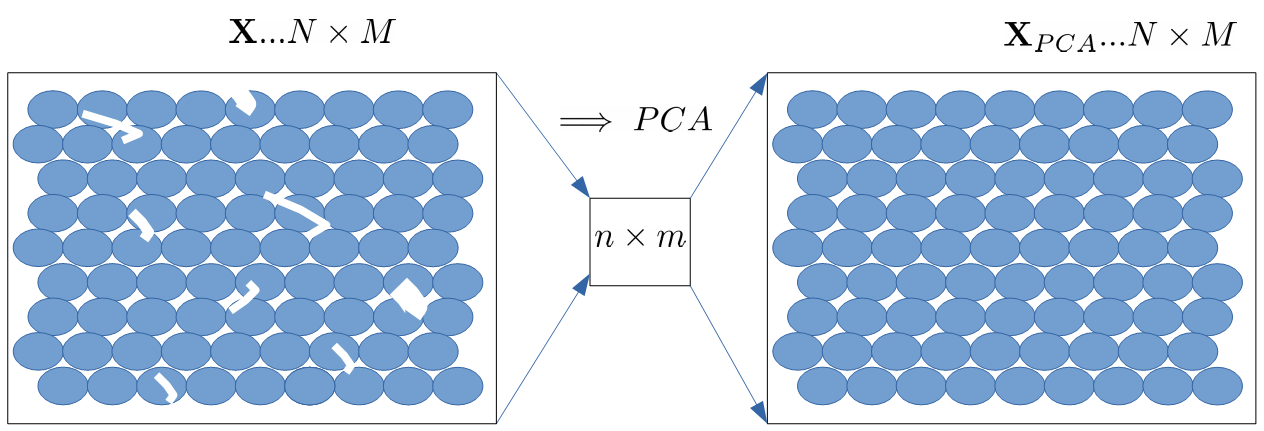


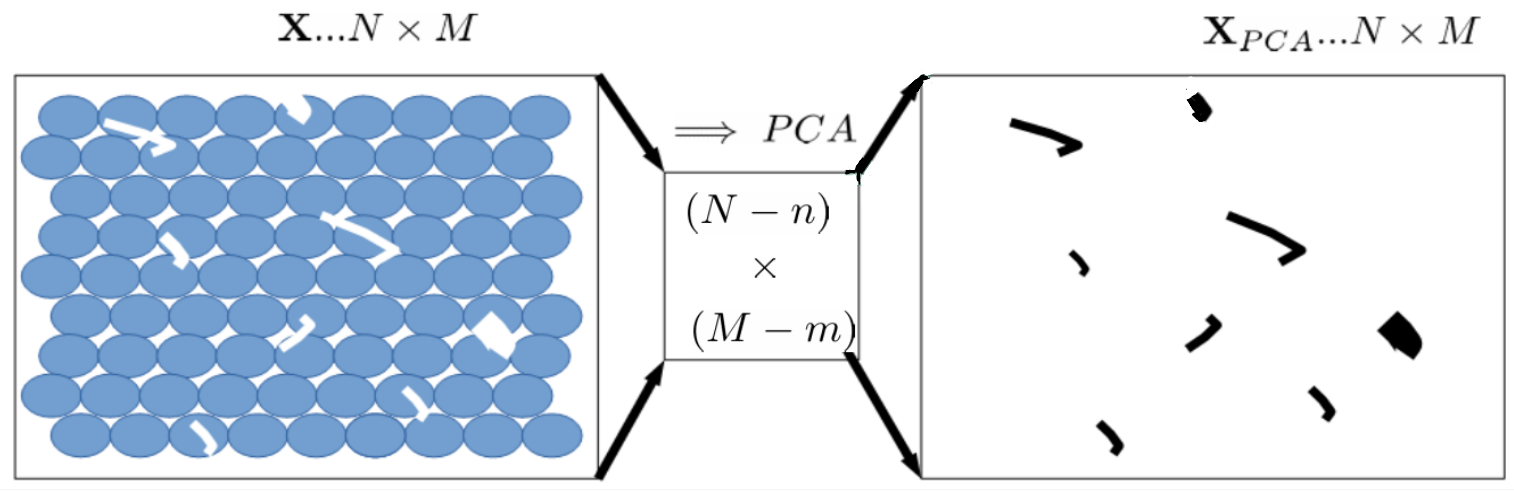

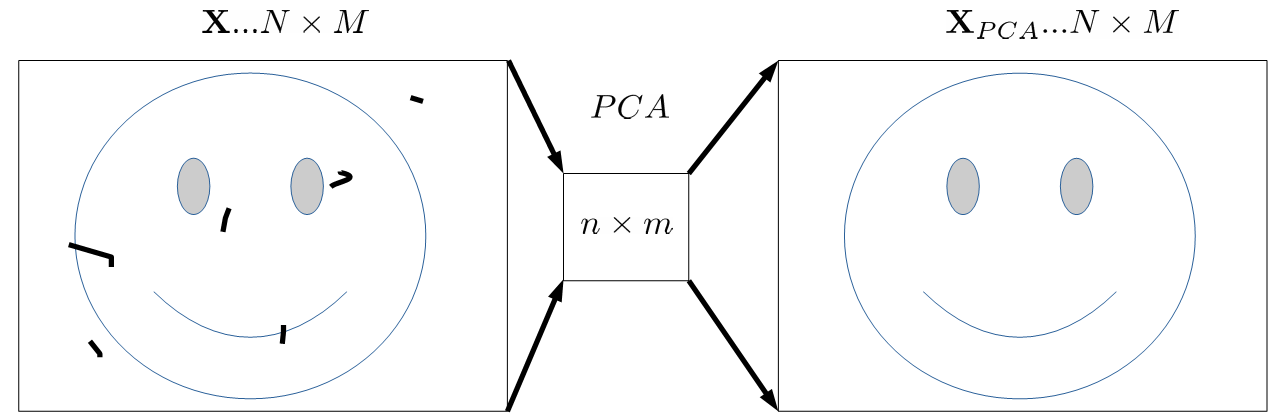

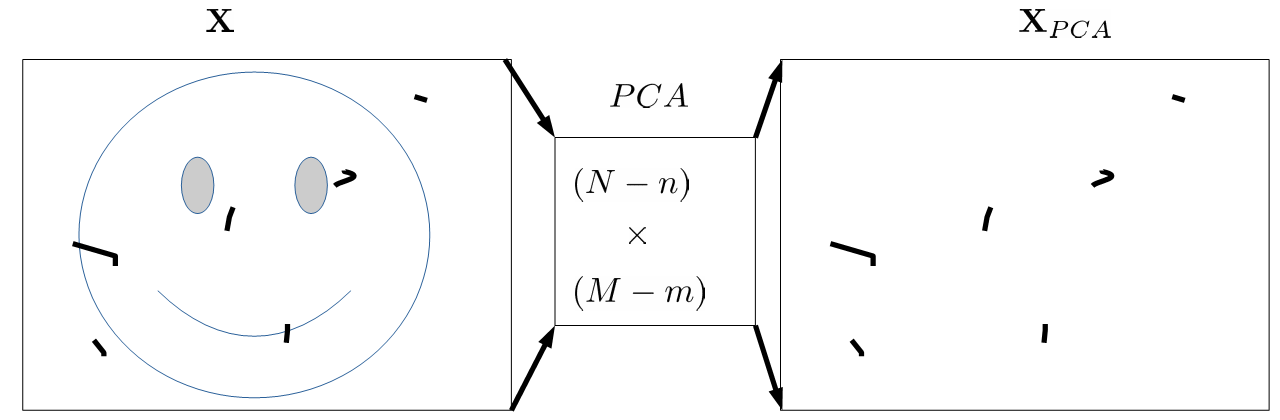

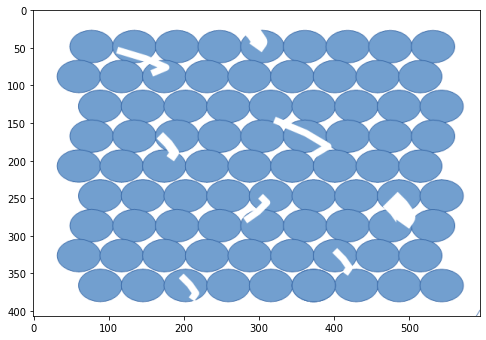

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL as pil
img1="./img/regular_patttern_with_perturb.png"


im1 = pil.Image.open(img1)


plt.figure(figsize=(8,8)) 
plt.imshow(im1)
plt.show()

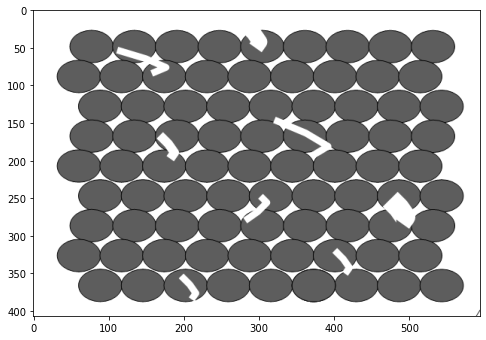

im1 is now matrix , ie. <class 'numpy.ndarray'> (407, 594)


In [7]:
from scipy import signal
im1=np.mean(im1,2)  # gray obr., 2-D matice,...X

plt.figure(figsize=(8,8)) 
plt.imshow(im1,cmap='gray')
plt.show()

print("im1 is now matrix , ie.", type(im1), im1.shape)


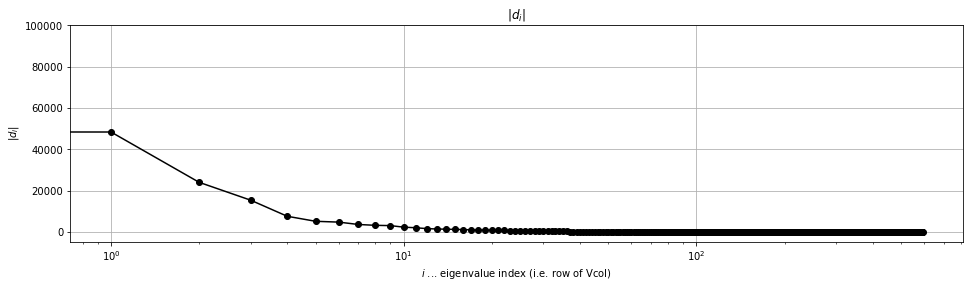

In [8]:
X=im1.copy()
X=(X-np.mean(X))/np.std(X)

covX=np.dot(X.T,X)  # covariance matrix (M x M)

d,Vcols=np.linalg.eig(covX)   # eigenc vals. an d vecs. y

plt.figure(figsize=(16,4)) 
plt.title("$|d_i|$")
plt.semilogx(abs(d),'-ok')
plt.ylabel('$|d_i|$')
plt.xlabel('$i$ ... eigenvalue index (i.e. row of Vcol)')
plt.grid();plt.show()


In [9]:
print("X ... N x M =",X.shape)
m=6
print("choosing m=",m)

Xcols=np.dot(X,Vcols[:,:m])  # compression to m columns

print("Xcols ... N x m =",Xcols.shape)


X ... N x M = (407, 594)
choosing m= 6
Xcols ... N x m = (407, 6)


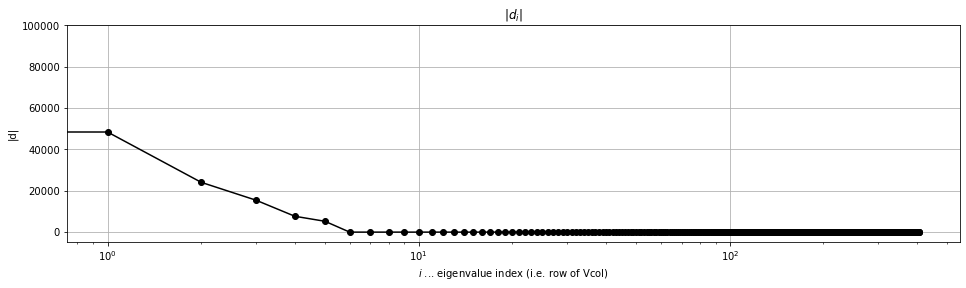

In [10]:
# compression of rows 
Xrows=Xcols.T   
covX=np.dot(Xrows.T,Xrows)      # covariance matrix (N x N)
d,Vrows=np.linalg.eig(covX)

plt.figure(figsize=(16,4)) 
plt.title("$|d_i|$")
plt.semilogx(abs(d),'-ok')
plt.ylabel('|d|')
plt.xlabel('$i$ ... eigenvalue index (i.e. row of Vcol)')
plt.grid();plt.show()

Xrows ... n x M = (6, 407)
volba n= 6
Xcompressed ... n x m = (6, 6)


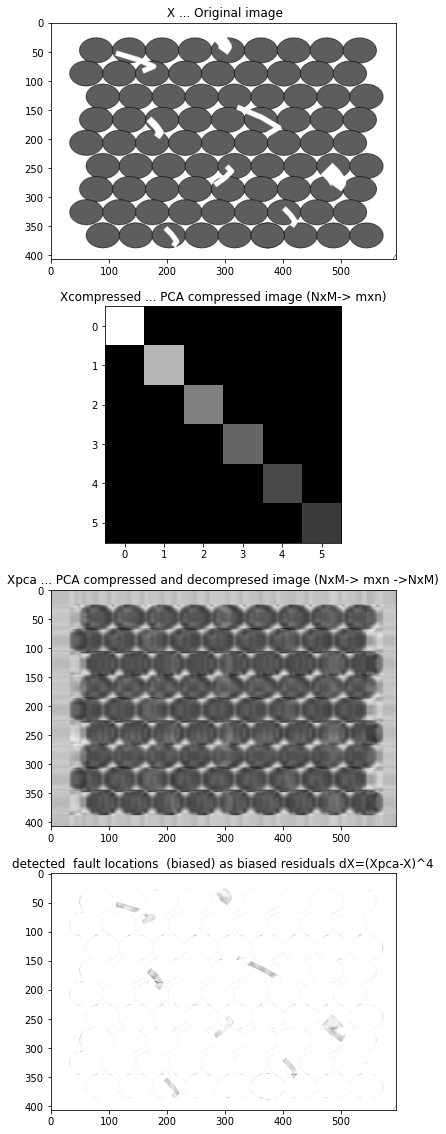

In [11]:
print("Xrows ... n x M =",Xrows.shape)
n=6
print("volba n=",n)
Xcompressed=np.dot(Xrows,Vrows[:,:n])  # compressed image to n rowsn and m columns
print("Xcompressed ... n x m =",Xcompressed.shape)

### Decompression - preserving correlated phenomena

Xpca_rows=np.dot(Xcompressed,Vrows[:,:n].T)
Xpca_cols=Xpca_rows.T
Xpca=np.dot(Xpca_cols,Vcols[:,:m].T)

Xpca=np.real(Xpca)


plt.figure(figsize=(16,20)) 
plt.subplot(411)
plt.imshow(X,cmap='gray') ; plt.title(" X ... Original image")
plt.subplot(412)
plt.imshow(abs(Xcompressed),cmap='gray') ; plt.title("Xcompressed ... PCA compressed image (NxM-> mxn)")
plt.subplot(413)
plt.imshow(Xpca,cmap='gray')
plt.title("Xpca ... PCA compressed and decompresed image (NxM-> mxn ->NxM)")
plt.subplot(414)
dX=(Xpca-X)**4   # biasing (moving white more far from black), !powers 2,4,6,8!
plt.imshow(-dX,cmap='gray')
plt.title("detected  fault locations  (biased) as biased residuals dX=(Xpca-X)^4")
plt.show()




<div style="width:100%;height:10px;background-color:#777;margin:10px 0 10px 0;"></div>


### SVD

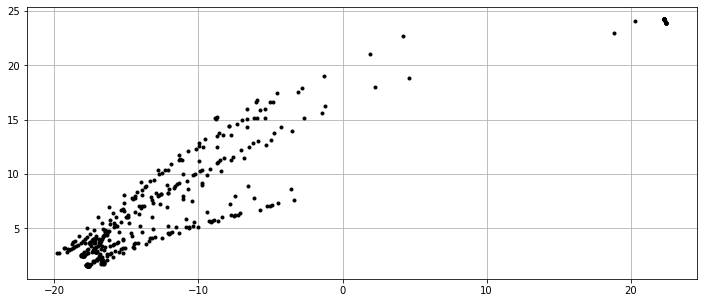

In [12]:
from sklearn.decomposition import TruncatedSVD

##https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
Xsvd=svd.fit_transform(X)

figure(figsize=(12,5))
plot(Xsvd[:,0],Xsvd[:,1],'.k');grid()
show()

### T-SNE

t-distributed Stochastic Neighbor Embedding

[[-23.797447  42.719643]
 [ 29.060822  25.934505]
 [ -9.817577 -19.604431]]


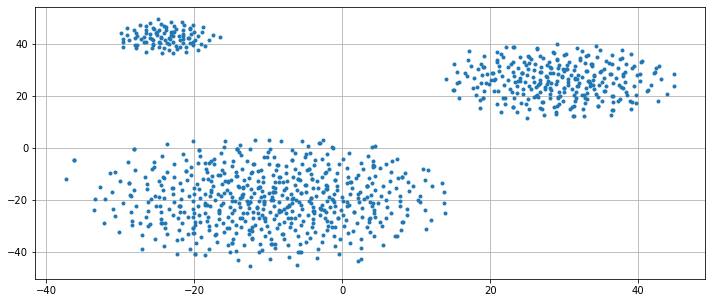

In [13]:
from sklearn.manifold import TSNE
#====
##tSNE
##T-distributed Stochastic Neighbor Embedding (t-SNE)
##https://lvdmaaten.github.io/tsne/
##https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding
##https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

tsne = TSNE(n_components=2, random_state=0)
Xtsne = tsne.fit_transform(X_uns)

kmeans = KMeans(n_clusters=3).fit(Xtsne)
print(kmeans.cluster_centers_)

figure(figsize=(12,5))
plot(Xtsne[:,0],Xtsne[:,1],'.');grid()
show()


<div style="width:100%;height:10px;background-color:#777;margin:10px 0 10px 0;"></div>


<hr>

### UMAP

Except the need to understand its parameters to use the t-SNE method properly, a disadvantages of t-SNE can be computational complexity for large data  sets.



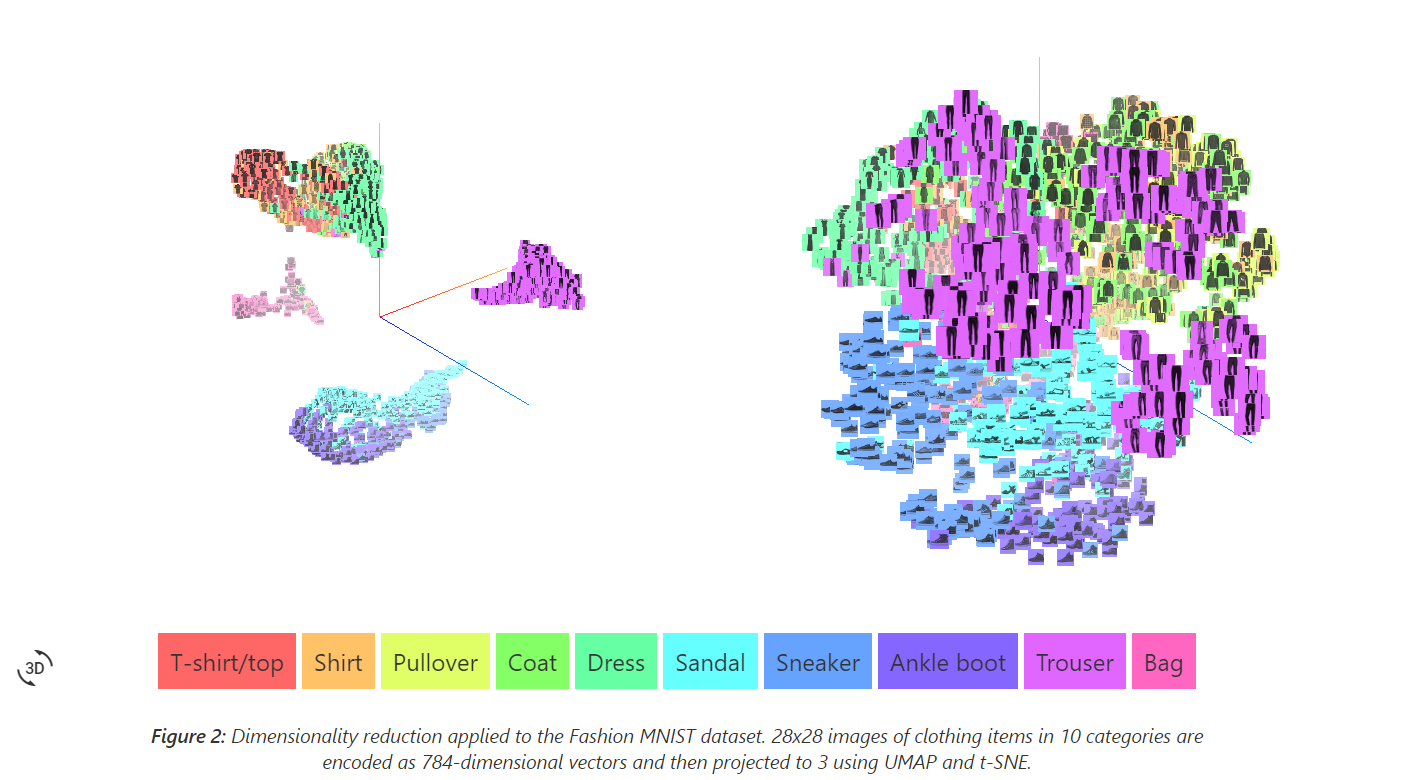
<center> Image adopted from [7] </center>

<hr>

## Invariant Coordinate Selection (ICS)


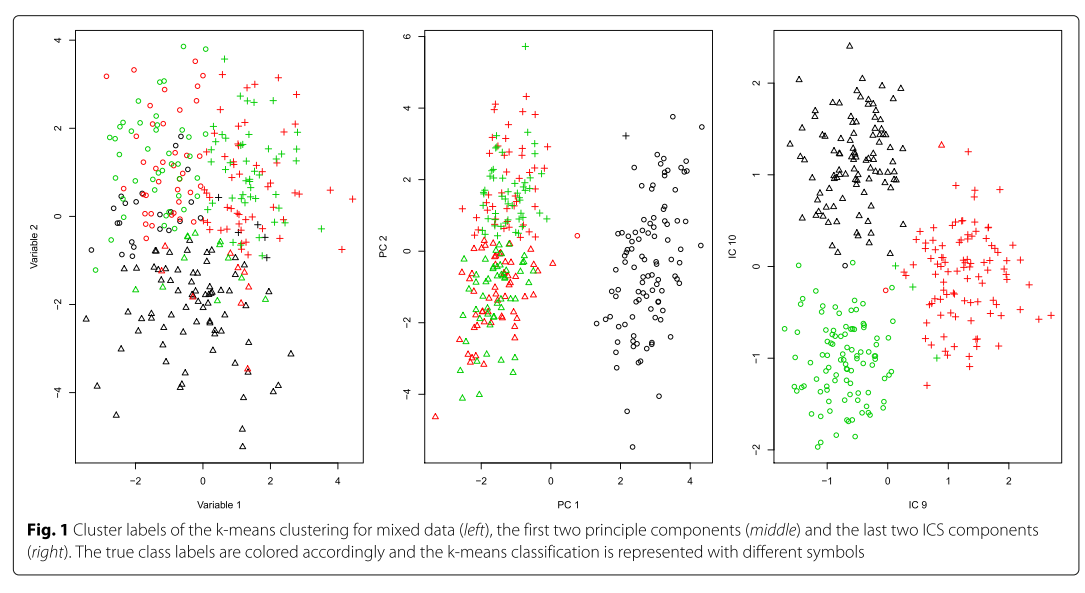

<center> image adopted from [8]</center>

## LSDA (Locality Sensitive Discriminant Analysis)

[9]

<div style="width:100%;height:10px;background-color:#777;margin:10px 0 10px 0;"></div>


<hr>

### SOM - Self Organizing Maps

###  Clustering and (other) Vizualization of N-dimensional data

https://users.ics.aalto.fi/jhollmen/dippa/node24.html

Wikipedia: The U-matrix (unified distance matrix) is a representation of a self-organizing map (SOM) where the Euclidean distance between the codebook vectors of neighboring neurons is depicted in a grayscale image. This image is used to visualize the data in a high-dimensional space using a 2D image.


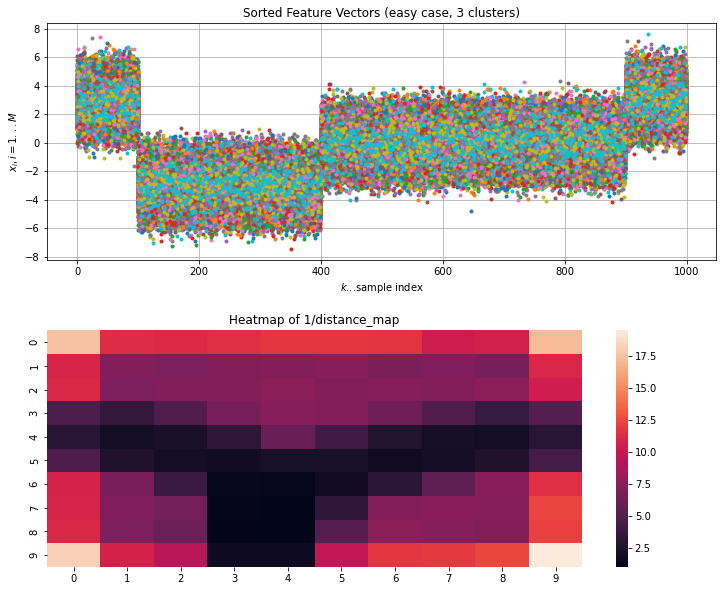

In [18]:
from minisom import MiniSom 
import seaborn as sns

#X_uns=loadtxt("x_unsorted.csv",delimiter=",")

M=500   # Lenght of a feature vector
N=1000  # total number of feature vectors

X=randn(N,M) # feature vectors are in rows 
X[:100,:]=X[:100,:]+3
X[100:400,:]=X[100:400,:]-3
X[-100:,:]=X[-100:,:]+3
data=X

#data=X_uns

M=data.shape[1] # M feature vector length

DIM = M
som_shape = (10,10) # NETWORK DIMENSION 
epoch = 5000 # HOW MANY ITERATIONS

# --- Inint and Train
som = MiniSom(som_shape[0], som_shape[1], DIM, sigma=1.6, learning_rate=0.5, 
              activation_distance='euclidean',topology='rectangular', # square grid
              neighborhood_function='gaussian', random_seed=10) # 
som.pca_weights_init(data) # init via PCA

som.train_batch(data, epoch, verbose=False) # batch training -
# som.train_random(data, epoch, verbose=False) # random training 

# --- SOM Coordinates, matrix of unified distances and weights (U-matrix)
umatrix = som.distance_map()

figure(figsize=(12,10))
subplots_adjust(hspace=0.3)
subplot(211)
plot(X[:,:],'.');
xlabel("$k$...sample index");title("Sorted Feature Vectors (easy case, 3 clusters)");ylabel("$x_i, i=1...M$");grid()
subplot(212)
title('Heatmap of 1/distance_map')
sns.heatmap(1/(umatrix+.001), annot=False)
show()


<div style="widht:100%;height:5px;background-color:#408d62"></div>
<h3> References </h3>
<br>

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

[#] 

[1] https://scikit-learn.org/stable/modules/clustering.html

[2] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

[3] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html#sklearn.neighbors.kneighbors_graph

[4] https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

[5] https://en.wikipedia.org/wiki/Cluster_analysis (overview)

[6] https://www.kdnuggets.com/2018/06/5-clustering-algorithms-data-scientists-need-know.html (animation of DBSCAN and Gaussian Mixture Model and more)

[7] https://pair-code.github.io/understanding-umap/

[8] D. Fischer et al., “Subgroup detection in genotype data using invariant coordinate selection,” BMC Bioinformatics, vol. 18, no. 1, p. 173, Dec. 2017, doi: 10.1186/s12859-017-1589-9.

[9] Cai, Deng et al. “Locality Sensitive Discriminant Analysis.” International Joint Conference on Artificial Intelligence (2007).

[10] A. Soleymani, “What is K-Medoids Clustering and When should you use it instead of K-Means,” Medium. Accessed: Dec. 14, 2023. [Online]. Available: https://medium.com/@ali.soleymani.co/beyond-scikit-learn-is-it-time-to-retire-k-means-and-use-this-method-instead-b8eb9ca9079a



<hr>
<div style="width:100%;">
<div style="width:5%;float:left;">[$\alpha$] </div>
<div style="width:95%;float:left;align:justify;">
 </div></div>
 
 <div style="width:100%;">
<div style="width:5%;float:left;">[$\beta$] </div>
<div style="width:95%;float:left;align:justify;">
 </div></div>
 

<hr>


<br>

<div style="width:100%;height:20px;background-color:#408d62"></div>
<br>

<div style="width:100%;height:30px">
<div style="width:70%;height:30px;float:left;text-align:center;font-size:10px">&#169;  Ivo Bukovsky, Dpt. of Comp. Sci., USB in CB, 2021 </div>
<div style="width:30%;height:30px;float:left;"><img src="img/JCU_DCS.png" style="height:30px;"/> </div>
</div>


